<div>
    <center style="background-color:#0c2f66; color:white">
    <h1><span><b>Crypto Trading Analysis</b></span></h1>
    <h2><span>Forcasting usign LSTM</span></h2>
    <h5>Realized by CHAKOUKI EL HASSAN</h5>
    <br>   
    </center>
</div>

<div>
<img src="https://www.daf-mag.fr/Assets/Img/BREVE/2019/5/339997/Les-crypto-monnaies-potentiel-pret-eclore-F.jpg" />
</div>


<div>
    <h1><center style="background-color:#0c2f66; color:white; height:60px">Cryptocurrency</center></h1>
</div>

According to Wikipedia, a cryptocurrency, crypto-currency, or crypto is a collection of binary data which is designed to work as a medium of exchange. Individual coin ownership records are stored in a ledger, which is a computerized database using strong cryptography to secure transaction records, to control the creation of additional coins, and to verify the transfer of coin ownership. Cryptocurrencies are generally fiat currencies, as they are not backed by or convertible into a commodity. 

Bitcoin, first released as open-source software in 2009, is the first decentralized cryptocurrency. Since the release of bitcoin, many other cryptocurrencies have been created.

<div>
    <h1><center style="background-color:#0c2f66; color:white; height:60px">Technical Indicator</center></h1>
</div>
Technical Analysis (TA) is a popular technique to evaluate stocks or coins based on similar data points and elements. This articulation will tell you about TA while also delving into trading indicators before we conclude with the best indicators for you. 

👉Import librarys

In [1]:
# from matplotlib.finance import candlestick2_ohlc
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime as dt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import math
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Install finplot library
!pip -q install mplfinance
import mplfinance as mpf

***

👉 Source of my data that i use in this project :
https://www.kaggle.com/competitions/g-research-crypto-forecasting/data

In [2]:
# load dataset
train = pd.read_csv("./data/train.csv")
asset_details = pd.read_csv("./data/asset_details.csv")
df_test = pd.read_csv("./data/example_test.csv")
mapping = dict(asset_details[['Asset_ID', 'Asset_Name']].values)
train["Asset name"] = train["Asset_ID"].map(mapping)

In [3]:
df_train = train
df_asset_details = asset_details

In [4]:
df_train.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Asset name
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218,Bitcoin Cash
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399,Binance Coin
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643,Bitcoin
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922,EOS.IO
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264,Ethereum Classic


In [5]:
asset_details.sort_values(by=['Weight'], inplace=True, ascending=False)

Bitcoin has highest weight is the top on the list, followed by Ethereum. I will focus on the top two crypto currencies.

In [6]:
temp = train.reset_index(drop = True) 
temp['TIME'] = pd.to_datetime(temp['timestamp'], unit='s')

In [7]:
##########TRANSACTIONS##########
temp['Year'] = temp['TIME'].dt.year
temp.columns =[column.replace(" ", "_") for column in temp.columns]
temp.dropna()[['Open', 'High', 'Low', 'Close', 'Volume','VWAP']]
volume_yr = temp.groupby(['Year','Asset_name'])['Volume'].max().reset_index()
volume_yr = volume_yr.query("Year == 2021")

👉 plot volume of crypto currency by year 

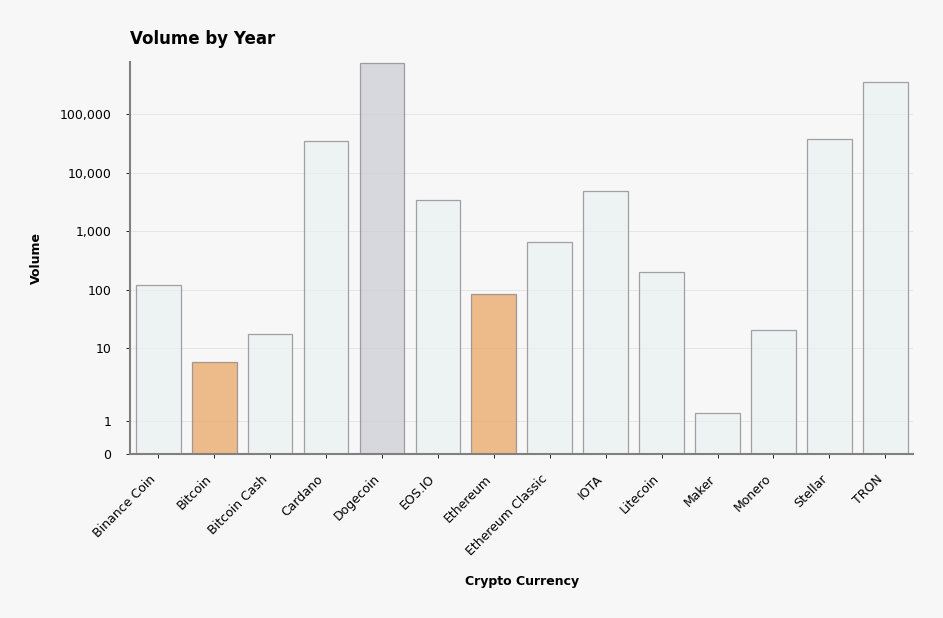

In [8]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(3, 5), facecolor='#F7F7F7')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

background_color = "#F7F7F7"
color_map = ["#E8F0F2" for _ in range(20)]
color_map[4] = "#C9CCD5" #F2A154 79B4B7
color_map[1] = "#F2A154"
color_map[6] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

for s in ['bottom','left']:
  ax0.spines[s].set_linewidth(0.5)
  ax0.spines[s].set_color('grey')
    
#graph
ax0 = sns.barplot(ax=ax0, y=volume_yr['Volume']/1000, x=volume_yr['Asset_name'], 
                      zorder=2, linewidth=0.3, edgecolor="#7F7C82", 
                      orient='v', saturation=0.9, alpha=0.7)
ax0.grid(which='major', axis='y', zorder=0, color='#CDD0CB', linewidth=0.2, alpha=0.5)
ax0.set_yscale('symlog')

#format axis
ax0.set_ylabel("Volume",fontsize=3, weight='semibold')
ax0.set_xlabel("Crypto Currency",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.2, length=1)
plt.setp( ax0.xaxis.get_majorticklabels(), rotation=45, ha="right" )

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1+2000000, 'Volume by Year', fontsize=4, ha='left', va='top', weight='semibold')

y_format = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
ax0.yaxis.set_major_formatter(y_format)

plt.show()

New comer crypto currency Dodgecoin, has highest volume transaction this year, while the two most popular currencies Bitcoin and Etherium are a lot less volumes.

<div>
    <h1><center style="background-color:#0c2f66; color:white; height:60px">Bitcoin Performance</center></h1>
</div>
Now I will see how is the performance of Bitcoin from the data. The given data is from 2018 until end of 2020 last year, lowest timeframe is in seconds. For our analysis let's assume we will trade on daily time frame or longer. I use simple technical indicators that commonly use for technical analysis:<br> 👉<span style="font-weight: bold;">Simple Moving Average (SMA)</span> and<br>👉<span style="font-weight: bold;">Relative Strength Index (RSI)</span>.

#### 👉1.1-Moving Average
Moving averages simplify and smoothen price fluctuations, reducing the noise and giving you a better idea of which direction the market is going, and where it might potentially go. Reducing noise from a chart will give you a much clearer picture of what is happening.

MA’s are calculated by summing up the previous data points, or candles, which are then divided by the number of points. What does this mean?

A 20 MA is derived from summing up the previous 20 periods, divided by 20.
A 100 MA is derived from summing up the previous 100 periods, divided by 100.

#### 👉1.2-Simple Moving Average (SMA)
The Simple Moving Average, or SMA line, is calculated based on the closing price of a period. A ‘period’ means a candle. For example, the closing price of 3 periods or candles is summed up and then divided by 3. Every period in the calculation has the same weight.

             An example: we have 3 periods, $50, $45, and $60.
             The formula is: 50 + 45 + 60 = 155 / 3 (the number of periods) = 51.66 as a 3 SMA.

The Simple Moving Average is very smooth and is at its strongest as a long-term indicator, on any timeframe.

In [9]:
#Extract Bitcoin data
temp = train.query("Asset_ID == 1").reset_index(drop = True) # bitcoin
temp['TIME'] = pd.to_datetime(temp['timestamp'], unit='s')

all_data = temp.groupby(['Asset_ID', 'Asset name']).resample('D', on='TIME', origin='start').agg(
    {"Open": "first", 
     "Close": "last", 
     "Low": "min", 
     "High": "max",
     "Volume": "last",
     "VWAP": "max"
    }
).dropna()[['Open', 'High', 'Low', 'Close', 'Volume','VWAP']]

all_data=all_data.reset_index()
all_data=all_data.set_index('TIME')

In [10]:
all_data.head()

,Asset_ID,Asset name,Open,High,Low,Close,Volume,VWAP
TIME,,,,,,,,
2018-01-01 00:01:00,1,Bitcoin,13835.194,14442.9,12750.00,13468.698,66.772577,13932.686211
2018-01-02 00:01:00,1,Bitcoin,13459.606,15500.0,12798.00,14743.424,87.582945,15251.921309
2018-01-03 00:01:00,1,Bitcoin,14739.148,15599.7,14150.00,15107.792,80.601941,15412.929986
2018-01-04 00:01:00,1,Bitcoin,15096.770,15500.1,13918.04,15158.492,97.776206,15383.149656
2018-01-05 00:01:00,1,Bitcoin,15158.346,17200.0,14600.00,16935.556,63.952918,17124.127038


In [11]:
start = dt.datetime.strptime('2018-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2021-09-20', '%Y-%m-%d')
selected_data = all_data.loc[start:end,['Open','High','Low','Close', 'VWAP', 'Volume']]

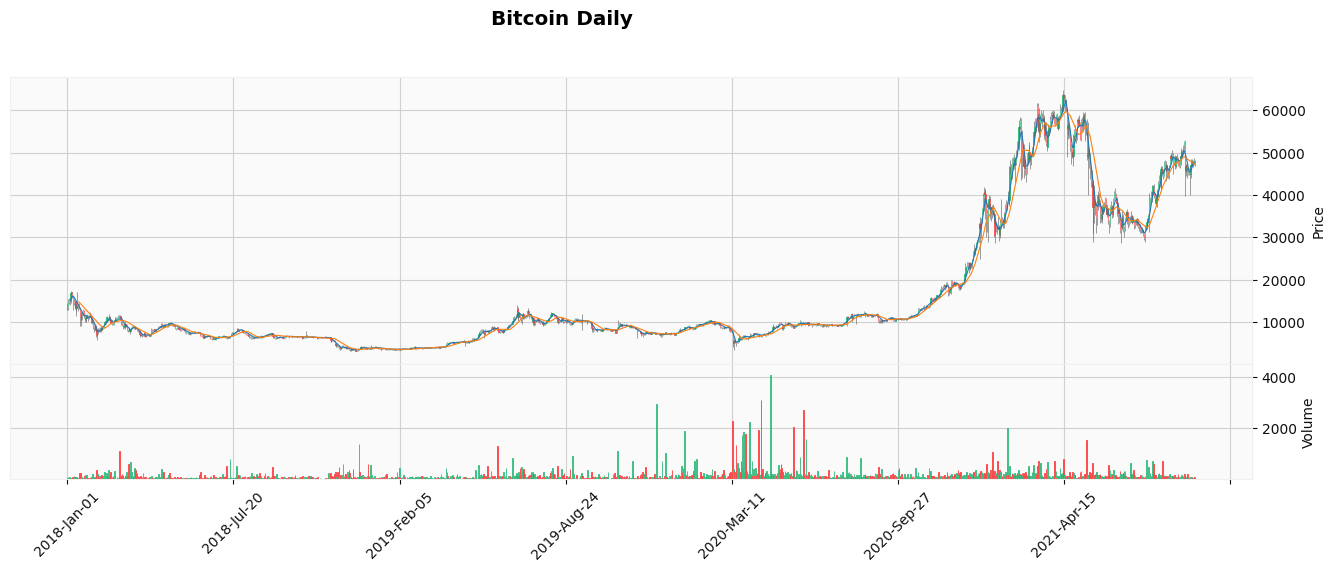

In [14]:
mpf.plot(selected_data, # the dataframe containing the OHLC (Open, High, Low and Close) data
          type='candle', # use candlesticks 
          volume=True, # also show the volume
          mav=(5, 15), # use two different moving averages
          figratio=(3,1), # set the ratio of the figure
          style='yahoo',  # choose the yahoo style
          title='Bitcoin Daily'
          )

We can see that by using simple technical indicators on daily trading, we can get nice profits. In 2020 shows a significant price increases started around May, despite of the pandemic of Covid-19. We see the spike of Covid-19 was during Marc 2020 then back to rise again during pandemic.

#### 👉1.3-Relative Strength Index (RSI)
RSI is one of the most common momentum indicator aimed at quantifies price changes and the speed of such change. The most elementary way of using the index is buying when an asset or cryptocurrency is oversold, and selling when it’s overbought.

Generally, an asset is overbought when the RSI value is 70% or above, and oversold when the value is 30% or below. When an asset is overbought, it’s a clear signal of a looming downtrend. On the flip side, oversold security is a sign of an incoming upward trend. In this case, the weakness of the asset is running out of steam and it’s gathering momentum to climb higher. 

RSI is the source of diverse trend trading strategies. One other common trading strategy is buying or selling when RSI hits the midline or crosses it. This depicts the start of a new trend. 

When the RSI is above 50, a bullish trend is brewing. When it’s below 50, it’s the start of a bearish trend. 

While using the midline cross-trading strategy, traders frequently use the ratios of 70/30, 50/50 or 60/40 as resistance and support in bullish or bearish trends. 

When the resistance suffers a hit, a trend reversal may occur. Hence, traders should spring to action accordingly.

In [15]:
#RSI
all_data['Diff'] = all_data.groupby('Asset_ID')['Close'].transform(lambda x: x.diff())
all_data['Up'] = all_data['Diff']
all_data.loc[(all_data['Up']<0), 'Up'] = 0

all_data['Down'] = all_data['Diff']
all_data.loc[(all_data['Down']>0), 'Down'] = 0 
all_data['Down'] = abs(all_data['Down'])

all_data['avg_5up'] = all_data.groupby('Asset_ID')['Up'].transform(lambda x: x.rolling(window=5).mean())
all_data['avg_5down'] = all_data.groupby('Asset_ID')['Down'].transform(lambda x: x.rolling(window=5).mean())

all_data['avg_15up'] = all_data.groupby('Asset_ID')['Up'].transform(lambda x: x.rolling(window=15).mean())
all_data['avg_15down'] = all_data.groupby('Asset_ID')['Down'].transform(lambda x: x.rolling(window=15).mean())

all_data['RS_5'] = all_data['avg_5up'] / all_data['avg_5down']
all_data['RS_15'] = all_data['avg_15up'] / all_data['avg_15down']

all_data['RSI_5'] = 100 - (100/(1+all_data['RS_5']))
all_data['RSI_15'] = 100 - (100/(1+all_data['RS_15']))

all_data['RSI_ratio'] = all_data['RSI_5']/all_data['RSI_15']

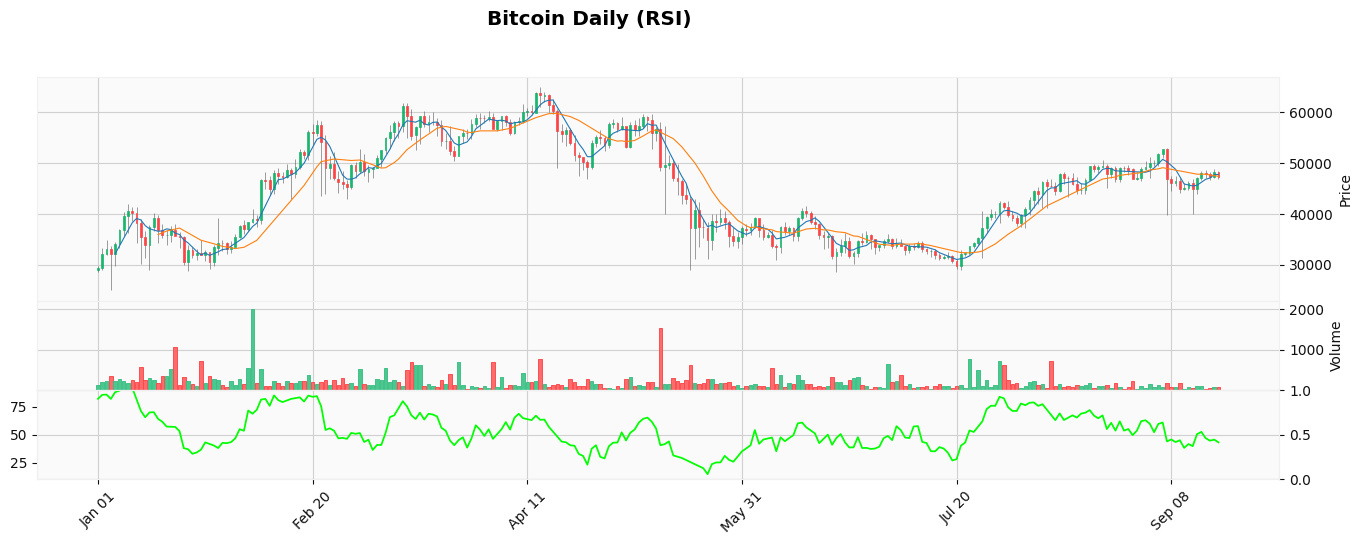

In [16]:
start = dt.datetime.strptime('2021-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2021-09-20', '%Y-%m-%d')
selected_data = all_data.loc[start:end,['Open','High','Low','Close','RSI_15', 'VWAP', 'Volume']]
apd = mpf.make_addplot(selected_data['RSI_15'],panel=2,color='lime',ylim=(10,90),secondary_y=True)
mpf.plot(selected_data, # the dataframe containing the OHLC (Open, High, Low and Close) data
        type='candle', # use candlesticks 
        volume=True, # also show the volume
        mav=(5,15), # use two different moving averages
        figratio=(3,1), # set the ratio of the figure
        addplot=apd, # RSI
        style='yahoo',  # choose the yahoo style
        title='Bitcoin Daily (RSI)' # title
        )

The chart shows the best performance of Bitcoin this year. By combining SMA and RSI together we have a better indicators for trading decision. The technical indicator tells that we only buy when the the blue line (SMA_5) is above red line (SMA_15) and RSI is above 80, and sell when the red line is below the green line and RSI is below 20.

You see the price drop in January this year, then rebound back and continue rise and reach all time high at April. RSI indicator reach its lowest below 20 in end of April. Fast SMA (5) crossing the long SMA (15) happened few times, where you can buy, and sell when SMA (5) crossing down the SMA (15). RSI helps tells the confirmation to buy or sell.

<div>
    <h1><center style="background-color:#0c2f66; color:white; height:60px">Ethereum Performance</center></h1>
</div>

Now I will do the same for Ethereum and see its performance.

In [17]:
#Extract Ethereum data
temp1 = train.query("Asset_ID == 6").reset_index(drop = True) # Etherium
temp1['TIME'] = pd.to_datetime(temp1['timestamp'], unit='s')

all_data1 = temp1.groupby(['Asset_ID', 'Asset name']).resample('D', on='TIME', origin='start').agg(
    {"Open": "first", 
     "Close": "last", 
     "Low": "min", 
     "High": "max",
     "Volume": "last",
     "VWAP": "max"
    }
).dropna()[['Open', 'High', 'Low', 'Close', 'Volume','VWAP']]

all_data1=all_data1.reset_index()
all_data1=all_data1.set_index('TIME')

In [18]:
#RSI
all_data1['Diff'] = all_data1.groupby('Asset_ID')['Close'].transform(lambda x: x.diff())
all_data1['Up'] = all_data1['Diff']
all_data1.loc[(all_data1['Up']<0), 'Up'] = 0

all_data1['Down'] = all_data1['Diff']
all_data1.loc[(all_data1['Down']>0), 'Down'] = 0 
all_data1['Down'] = abs(all_data1['Down'])

all_data1['avg_5up'] = all_data1.groupby('Asset_ID')['Up'].transform(lambda x: x.rolling(window=5).mean())
all_data1['avg_5down'] = all_data1.groupby('Asset_ID')['Down'].transform(lambda x: x.rolling(window=5).mean())

all_data1['avg_15up'] = all_data1.groupby('Asset_ID')['Up'].transform(lambda x: x.rolling(window=15).mean())
all_data1['avg_15down'] = all_data1.groupby('Asset_ID')['Down'].transform(lambda x: x.rolling(window=15).mean())

all_data1['RS_5'] = all_data1['avg_5up'] / all_data1['avg_5down']
all_data1['RS_15'] = all_data1['avg_15up'] / all_data1['avg_15down']

all_data1['RSI_5'] = 100 - (100/(1+all_data1['RS_5']))
all_data1['RSI_15'] = 100 - (100/(1+all_data1['RS_15']))

all_data1['RSI_ratio'] = all_data1['RSI_5']/all_data1['RSI_15']

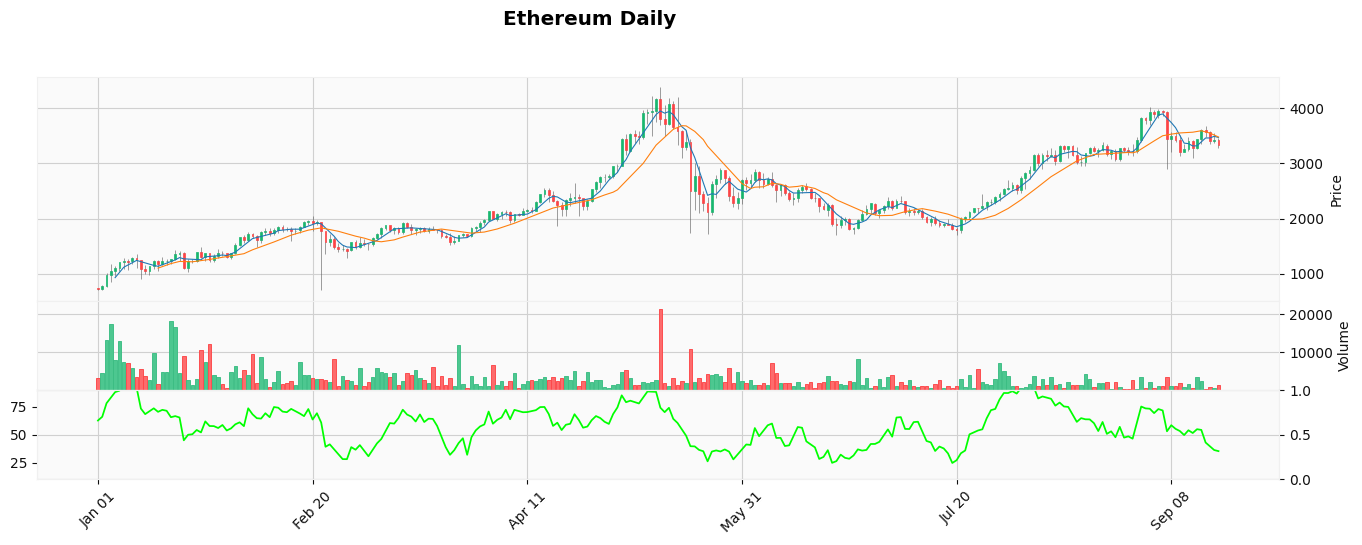

In [19]:
start = dt.datetime.strptime('2021-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2021-09-20', '%Y-%m-%d')
selected_data1 = all_data1.loc[start:end,['Open','High','Low','Close','RSI_15', 'VWAP', 'Volume']]
apd = mpf.make_addplot(selected_data1['RSI_15'],panel=2,color='lime',ylim=(10,90),secondary_y=True)
mpf.plot(selected_data1, # the dataframe containing the OHLC (Open, High, Low and Close) data
        type='candle', # use candlesticks 
        volume=True, # also show the volume
        mav=(5,15), # use two different moving averages
        figratio=(3,1), # set the ratio of the figure
        addplot=apd, # RSI
        style='yahoo',  # choose the yahoo style
        title='Ethereum Daily' # title
        )

<div>
    <h1><center style="background-color:#0c2f66; color:white; height:60px">LSTM Prediction</center></h1>
</div>

Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points (such as images), but also entire sequences of data (such as speech or video).

LSTM networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series.
A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell.

LSTMs are very powerful in sequence prediction problems because they’re able to store past information. This is important in our case because the previous price of a stock is crucial in predicting its future price.

## 2.1-<span class="title-section w3-xlarge">Bitcoin LSTM prediction</span>

In [20]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import math
plt.style.use('fivethirtyeight')

#### 👉 <span>Split the data.</span>

In [21]:
data = selected_data.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

# Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data itno x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

#### 👉 <span>Build the LSTM Model.</span>

In [22]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [25]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

150/150 [==============================] - 8s 25ms/step - loss: 0.0152


In [26]:
# Create the testing data set
# Create new array containing scaled values from index 1028 to 1359
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# convert data to numpy array
x_test = np.array(x_test)

# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean square error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )

2/2 [==============================] - 2s 32ms/step


#### 👉 <span class="title-section w3-large">Plot the data.</span>

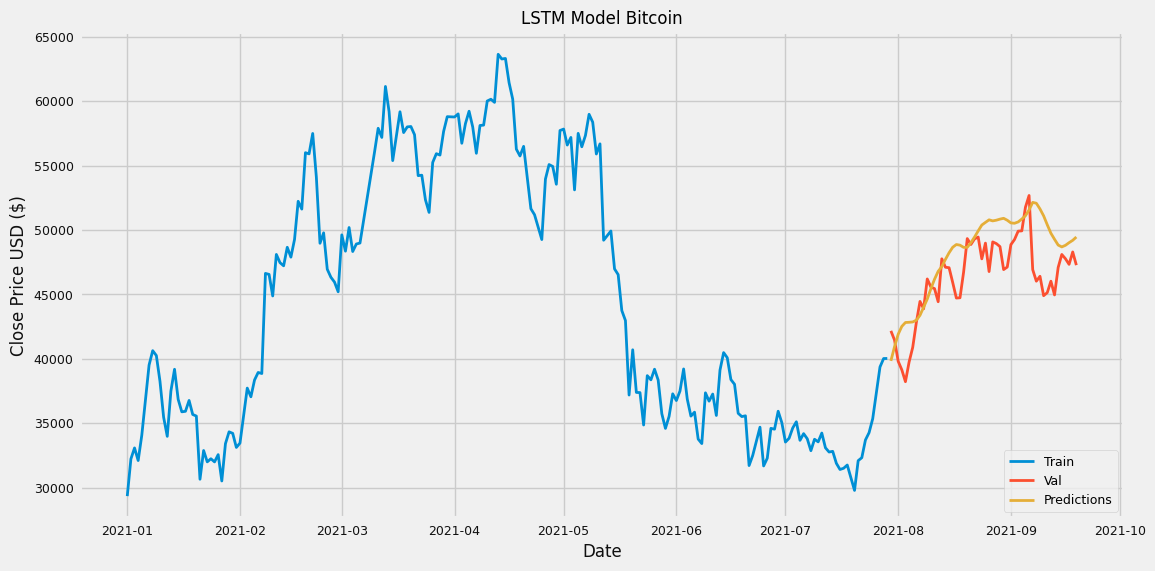

In [28]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(12,6))
plt.title('LSTM Model Bitcoin', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.tick_params(labelsize=9, width=0.2, length=1)

plt.plot(train['Close'], linewidth=2.0)
plt.plot(valid[['Close', 'Predictions']], linewidth=2.0)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right', fontsize=9)
plt.show()

## 2.2- <span class="title-section w3-xxlarge">Ethereum LSTM prediction</span>
Now let's do the same LSTM modeling for Ethereum as we did earlier for Bitcoin.

In [29]:
data1 = selected_data1.filter(['Close'])
dataset1 = data1.values
training_data_len1 = math.ceil(len(dataset1) * .8)
# Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data1 = scaler.fit_transform(dataset1)
# Create the training data set
# Create the scaled training data set
train_data1 = scaled_data1[0:training_data_len1, :]

# Split the data itno x_train and y_train data sets
x_train1 = []
y_train1 = []

for i in range(60, len(train_data1)):
    x_train1.append(train_data1[i-60:i,0])
    y_train1.append(train_data1[i,0])
    
# Convert the x_train and y_train to numpy arrays
x_train1, y_train1 = np.array(x_train1), np.array(y_train1)
# Reshape the data
x_train1 = np.reshape(x_train1, (x_train1.shape[0], x_train1.shape[1], 1))
# x_train.shape

# Build the LSTM Model
model1 = Sequential()
model1.add(LSTM(50, return_sequences=True, input_shape=(x_train1.shape[1], 1)))
model1.add(LSTM(50, return_sequences=False))
model1.add(Dense(25))
model1.add(Dense(1))

In [30]:
# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model1.fit(x_train1, y_train1, batch_size=1, epochs=1)

150/150 [==============================] - 10s 31ms/step - loss: 0.0209


In [31]:
# Create the testing data set
# Create new array containing scaled values from index 1028 to 1359
test_data1 = scaled_data1[training_data_len1 - 60: , :]

# Create the data sets x_test and y_test
x_test1 = []
y_test1 = dataset1[training_data_len1: , :]
for i in range(60, len(test_data1)):
    x_test1.append(test_data1[i-60:i, 0])
    
# convert data to numpy array
x_test1 = np.array(x_test1)

# reshape the data
x_test1 = np.reshape(x_test1, (x_test1.shape[0], x_test1.shape[1], 1))

# Get the models predicted price values
predictions1 = model1.predict(x_test1)
predictions1 = scaler.inverse_transform(predictions1)

# Get the root mean square error (RMSE)
rmse1 = np.sqrt( np.mean( predictions1 - y_test1 )**2 )

2/2 [==============================] - 2s 28ms/step


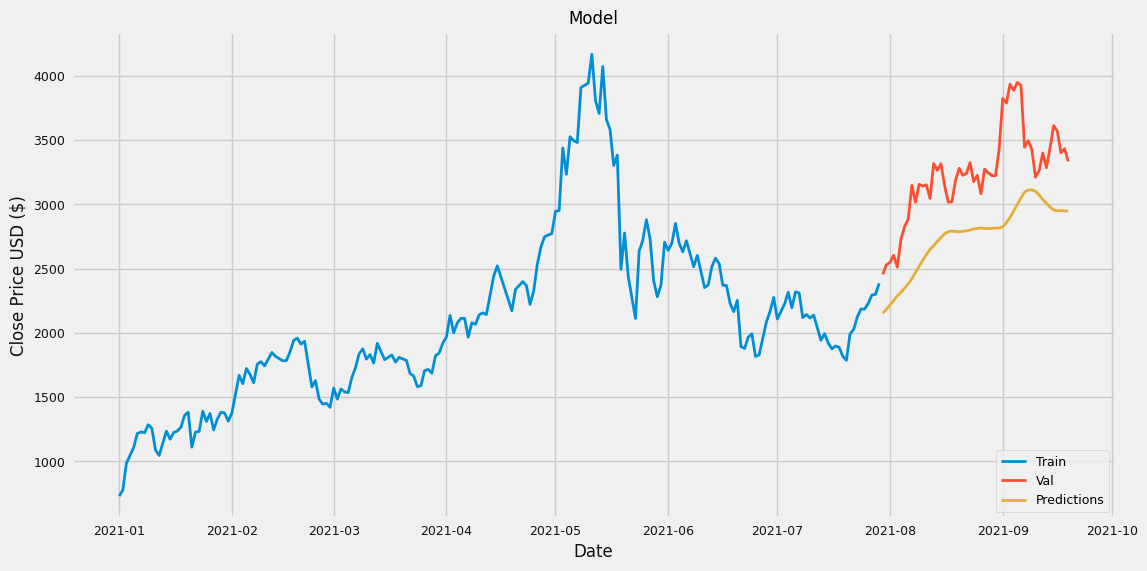

In [32]:
# Plot the data
train1 = data1[:training_data_len1]
valid1 = data1[training_data_len1:]
valid1['Predictions'] = predictions1

# Visualize the data
plt.figure(figsize=(12,6))
plt.title('Model', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.tick_params(labelsize=9, width=0.2, length=1)

plt.plot(train1['Close'], linewidth=2.0)
plt.plot(valid1[['Close', 'Predictions']], linewidth=2.0)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right', fontsize=9)
plt.show()

We see that the prediction line (green line) for Ethereum is aligned with the trend. If we bought the ethereum in early August at around USD21,000, then from this prediction we can sell it at above USD30,000, we can get a decent profit of around 30% within less than two months. We have tested the LTSM prediction modeling to Bitcoin and Ethereum and show that this model works well for crypto currency prediction. 

If we compare with technical indicator which help us in making trading decision, the machine learning approach provide us more confident prediction. We see the visualization prediction in the future where the price direction in the future. While on the other hand technical indicator will give us the signal much closer time frame before the direction start changing its direction.

The two cryptos analysis shows similar result with acceptable predictions. Then we can assure that this LSTM model should works well with other crypto currencies. So next we will do same steps to get the best estimator.

***

<span style="font-weight: bold;">Realized by:</span> <br><dd>CHAKOUKI EL HASSAN<br> DATA ENGINEER @INPT<Br>25/12/2025

<center style="font-weight: bold;"><h2>End !..</h2></center>